# Hands on ML Book: Example: 1.1

Here we want to compare and find a relation between the life expectancy and the gdp per capita
of the countries. <br>
We begin by importing the necessary packages in python:


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn import preprocessing

We imported the data from the websites as csv files and merged them using the countries as index.

In [2]:
# Load Better life index data
oecd_bli = pd.read_csv("bli_2015.csv", thousands = ',', delimiter = ',')
# Checking if it is a Pandas Dataframe or not
#print(type(oecd_bli))
# Displaying 5 rows
oecd_bli.head(5)


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.9,NaN,NaN


Before merging the datasets we need to get an idea about its rows, columns, types, dimension etc.

In [3]:
# Checking the number of unique countries
print(pd.unique(oecd_bli["LOCATION"]).shape)
print('The dimension oced_bli is')
print(oecd_bli.shape)
# Descriptive info about the DataFrame
print('Other info oced_bli is')
print(oecd_bli.info())  
a = list(oecd_bli.columns.values)
print(len(a))

(37,)
The dimension oced_bli is
(3292, 17)
Other info oced_bli is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
LOCATION                 3292 non-null object
Country                  3292 non-null object
INDICATOR                3292 non-null object
Indicator                3292 non-null object
MEASURE                  3292 non-null object
Measure                  3292 non-null object
INEQUALITY               3292 non-null object
Inequality               3292 non-null object
Unit Code                3292 non-null object
Unit                     3292 non-null object
PowerCode Code           3292 non-null int64
PowerCode                3292 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3292 non-null float64
Flag Codes               1120 non-null object
Flags                    1120 non-null object
dtypes: float64(3), int64(1), object(13)
memory u

In [4]:
# Load IMF gdp per capita data
gdp_imf = pd.read_csv("gdp_per_capita.csv", thousands = ',', delimiter = '\t', encoding = 'latin1', na_values = 'n/a')
gdp_imf.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [5]:
# Checking the number of unique countries
print(pd.unique(gdp_imf["Country"]).shape)
# Info about the GDP DataFrame
print('The dimension oced_bli is')
print(gdp_imf.shape)
print('Other info oced_bli is')
print(gdp_imf.info())
list(gdp_imf.columns.values)

(190,)
The dimension oced_bli is
(190, 7)
Other info oced_bli is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
Country                          190 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB
None


['Country',
 'Subject Descriptor',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 '2015',
 'Estimates Start After']

In [6]:
# Preparing the Data

oecd_bli2 = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli2 = oecd_bli2.pivot(index="Country", columns="Indicator", values="Value")
b=list(oecd_bli2.index)
print(len(b))
oecd_bli2.head()


37


Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [7]:
gdp_imf.set_index("Country", inplace=True)

b=list(gdp_imf.index)
print(len(b))

gdp_imf.head()

190


,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [8]:
full_country_stats = pd.merge(left=oecd_bli2, right=gdp_imf, left_index=True, right_index=True)


full_country_stats.rename(columns={"2015": "GDP per capita"}, inplace=True)

#print(full_country_stats.shape)

full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head()
#list(full_country_stats.columns.values)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [9]:
#remove_indices = [0, 1, 6, 8, 33, 34, 35]
#keep_indices = list(set(range(36)) - set(remove_indices))
#print(keep_indices)
full_country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']]#.iloc[keep_indices]
#full_country_stats.head()
print(full_country_stats.shape)
print(full_country_stats.info)



(36, 2)
<bound method DataFrame.info of                  GDP per capita  Life satisfaction
Country                                           
Brazil                 8669.998                7.0
Mexico                 9009.280                6.7
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Chile                 13340.905                6.7
Slovak Republic       15991.736                6.1
Czech Republic        17256.918                6.5
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545           

After merging the data we needed to prepare some visualizations to get a better idea.

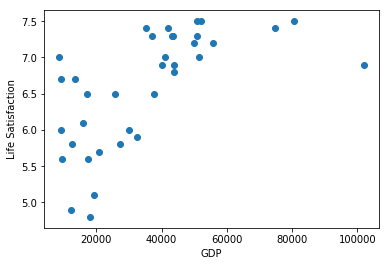

In [10]:
# Visualizing Data

plt.scatter(full_country_stats["GDP per capita"], full_country_stats["Life satisfaction"]) 
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.show()
x = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life satisfaction"]]

Now we apply a linear regression model and analyse how it performs.<br>
We are also going to apply KNN method to check what we get.

In [11]:
# Select a Linear Model
model1 = sklearn.linear_model.LinearRegression()
# Train the Model
model1.fit(x,y)
# Select a KNN Model
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the Model
model2.fit(x,y)
x_new = [[22587]] #cyprus gdp
y_new = model1.predict(x_new)
print(y_new)
y_new = model2.predict(x_new)
print(y_new)

[[6.28653637]]
[[5.76666667]]


We look at the weight coefficients and also the Mean square error, the RMSE and <br>
the coefficient of determination, $R^2 $ score

Coefficients: 
 [[2.3177337e-05]]
Intercept: 
 [5.76302986]
Mean squared error: 0.36
Variance score (r2 score) : 0.40
RMSE  : 0.60


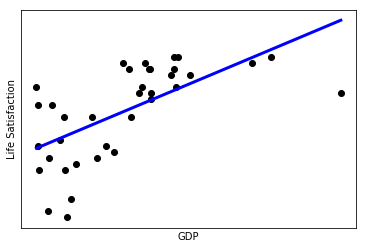

In [12]:
# predicting the same x values to check errors

y_pred = model1.predict(x)
x_line = np.c_[np.linspace(min(x), max(x), num=1000)]
y_line = model1.predict(x_line)

# so what are the weight values we get from the models
# The coefficients
print('Coefficients: \n', model1.coef_)
print('Intercept: \n', model1.intercept_ )

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2 score) : %.2f' % r2_score(y, y_pred))
# The RMSE error
print('RMSE  : %.2f' % np.sqrt(mean_squared_error(y,y_pred)))

# Plot outputs
plt.figure()
plt.scatter(x, y,  color='black')
plt.plot(x_line, y_line, color='blue', linewidth=3)
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.xticks(())
plt.yticks(())

plt.show()


The question arises, can we improve the model using polynomial regression?<br>
Let us check that.

Coefficients: 
 [[ 0.00000000e+00  5.60938483e-05 -3.60039740e-10]]
Intercept: 
 [5.21296588]
Mean squared error: 0.30
Variance score (r2 score) : 0.50
RMSE  : 0.55


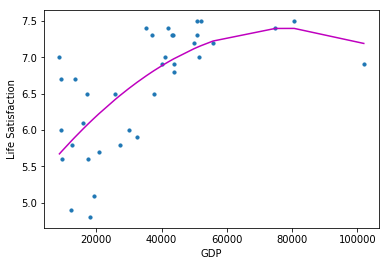

In [13]:
# Using polynomial regression

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model3 = sklearn.linear_model.LinearRegression()
model3.fit(x_poly, y)
y_poly_pred = model3.predict(x_poly)

# so what are the weight values we get from the models
# The coefficients

print('Coefficients: \n', model3.coef_) # for polyfeature method
print('Intercept: \n', model3.intercept_ ) # for polyfeature method

#print(model3.score(x,y)) #only for pipeline method, similar to R2 score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_poly_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2 score) : %.2f' % r2_score(y, y_poly_pred))
print('RMSE  : %.2f' % np.sqrt(mean_squared_error(y,y_poly_pred)))
plt.figure()
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred,'m-')
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.show()

# We do notice that the performance improves.

This is one way of doing polynomial regression. <br>
But we can also create a pipeline and do it.

0.5811964224773656
Mean squared error: 0.25
Variance score (r2 score) : 0.58
RMSE  : 0.50


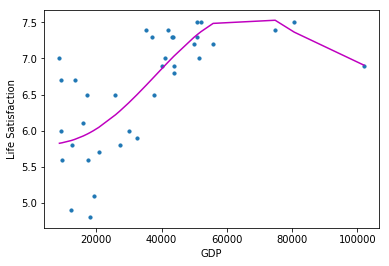

In [14]:
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(PolynomialFeatures(5), sklearn.linear_model.LinearRegression())
model4.fit(x, y)
y_poly_pred = model4.predict(x)

print(model4.score(x,y)) #only for pipeline method, similar to R2 score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_poly_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2 score) : %.2f' % r2_score(y, y_poly_pred))
print('RMSE  : %.2f' % np.sqrt(mean_squared_error(y,y_poly_pred)))
plt.figure()
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred,'m-')
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.show()

# We do notice that the performance improves.

Seems like it does improve our model. But what about using radial basis function <br>
in Linear regression? <br>
The RBF kernel method seems complicated ! lets create a user defined Pipeline RBF method.<br>
This function only works for 1D data

0.6718818436689963
Mean squared error: 0.20
Variance score (r2 score) : 0.67
RMSE  : 0.45


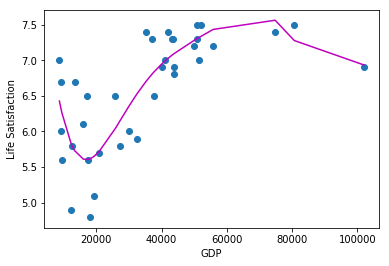

In [15]:
# Using RBF method.
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(5), sklearn.linear_model.LinearRegression())
gauss_model.fit(x, y)
yfit = gauss_model.predict(x)

print(gauss_model.score(x,y)) #only for pipeline method, similar to R2 score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, yfit))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2 score) : %.2f' % r2_score(y, yfit))
print('RMSE  : %.2f' % np.sqrt(mean_squared_error(y,yfit)))

plt.figure()
plt.scatter(x, y)
plt.plot(x, yfit, 'm-')
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.show()


Let us try the same thing using Gaussian Process RBF Kernel regression. It would be more general and it would work for multi dimensional data sets

0.5148609540857385
Mean squared error: 0.29
Variance score (r2 score) : 0.51
RMSE  : 0.54


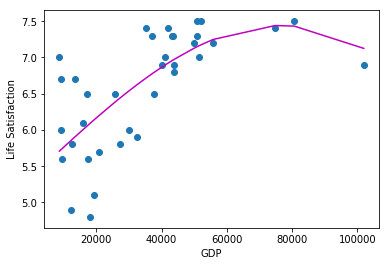

In [16]:
# Using Gaussian Kernel Process

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel ,ConstantKernel


# Instantiate a Gaussian Process model
kernel = ConstantKernel(constant_value=0.0001)*RBF(length_scale=20) + WhiteKernel(noise_level = 1)
gp = GaussianProcessRegressor(kernel=kernel,alpha=0.00001,n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred = gp.predict(x)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE

print(gp.score(x,y)) #only for pipeline method, similar to R2 score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2 score) : %.2f' % r2_score(y, y_pred))
print('RMSE  : %.2f' % np.sqrt(mean_squared_error(y,y_pred)))

plt.figure()

plt.scatter(x, y)
plt.plot(x, y_pred, 'm-')
plt.xlabel('GDP')
plt.ylabel('Life Satisfaction')
plt.show()

Let us check if Normalizing the data help our Linear regression and prediction. <br>
Expecially for the current small data set.

[35392.48147222]
[21338.48689035]
[6.58333333]
[0.777996]


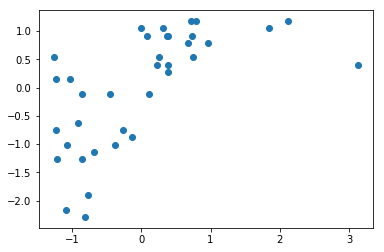

In [17]:
# Does normalizing with z-score change the performance? 

#x = scale(x, axis=0, with_mean=True, with_std=True, copy=True)
#y = scale(y, axis=0, with_mean=True, with_std=True, copy=True)
scaler1 = preprocessing.StandardScaler().fit(x)
#plt.scatter(x, y) 
#plt.show()
print(scaler1.mean_)
print(scaler1.scale_)
x_scaled = scaler1.transform(x)
scaler2 = preprocessing.StandardScaler().fit(y)
#plt.scatter(x, y) 
#plt.show()
print(scaler2.mean_)
print(scaler2.scale_)
y_scaled = scaler2.transform(y)
plt.scatter(x_scaled, y_scaled) 
plt.show()


In [18]:
# Select a Linear Model
model1 = sklearn.linear_model.LinearRegression()
# Train the Model
model1.fit(x_scaled,y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Make a Prediction
x_new = scaler1.transform([[22587]]) #cyprus gdp
y_new = model1.predict(x_new)
y_new = scaler2.inverse_transform(y_new, copy=None)
print(y_new)

[[6.28653637]]


In [20]:
# Select a KNN Model
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the Model
model2.fit(x_scaled,y_scaled)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [21]:
# Make a Prediction
x_new = scaler1.transform([[22587]]) #cyprus gdp
y_new = model2.predict(x_new)
y_new = scaler2.inverse_transform(y_new, copy=None)
print(y_new)

[[5.76666667]]


So if we do the same type of visualization with normalizied data. We should be able to get similar results.